## COVID-19 INTERACTIVE COMPREHENSIVE ANALYSIS AND VISUALIZATION DASHBOARD

## What is COVID-19?
> Coronaviruses are a group of related RNA viruses that cause diseases in mammals and birds. In humans, these viruses cause respiratory tract infections that can range from mild to lethal. Mild illnesses include some cases of the common cold (which is also caused by other viruses, predominantly rhinoviruses), while more lethal varieties can cause SARS, MERS, and COVID-19. Symptoms in other species vary: in chickens, they cause an upper respiratory tract disease, while in cows and pigs they cause diarrhea. There are as yet no vaccines or antiviral drugs to prevent or treat human coronavirus infections.

![Coronavirus Image](http://media.heartlandtv.com/images/hypatia-h_8d10874cfef9eb8b5227907dad863c25-h_a29499ce9e14ad513229b7a8ef7fc2e0.jpg)

## Displaying the total stats for Nigeria

In [93]:
from IPython.core.display import display, HTML
display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: orange; font-size:30px; margin-left:20px;'> Recovered: " + str(recovered_total) + "</span>"+
             "<span style='color: yellow; font-size:30px;margin-left:20px;'> Active: " + str(active_total) + "</span>"+
             "</div>")
       )

![Coronavirus Nig Image](https://www.ripplesnigeria.com/wp-content/uploads/2020/03/Health-authorities-in-South-Africa-treating-COVID-19-patients.jpg)

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns          
import plotly.express as px      #for beautiful visualization 
import folium       #for the map visualization

### Reading our dataset

In [2]:
covid_death_nig_data = pd.read_csv(r"C:\Users\seyi\Downloads\3\nigeria-covid19-data-master\data\csv\ncdc-covid19-states-daily-deaths.csv")

In [3]:
covid_recovered_nig_data = pd.read_csv(r"C:\Users\seyi\Downloads\3\nigeria-covid19-data-master\data\csv\ncdc-covid19-states-daily-recovered.csv")

In [4]:
covid_cases_nig_data = pd.read_csv(r"C:\Users\seyi\Downloads\3\nigeria-covid19-data-master\data\csv\ncdc-covid19-states-daily-cases.csv")

In [5]:
covid_states_nig_data = pd.read_csv(r"C:\Users\seyi\Downloads\3\nigeria-covid19-data-master\data\csv\ncdc-covid19-states.csv")

In [6]:
covid_molecular_lab_data = pd.read_csv(r"C:\Users\seyi\Downloads\3\nigeria-covid19-data-master\data\csv\ncdc-covid19-molecular-labs.csv")

In [7]:
covid_daily_updates_data = pd.read_csv(r"C:\Users\seyi\Downloads\3\nigeria-covid19-data-master\data\csv\ncdc-covid19-dailyupdates.csv")

## EDA 

In [8]:
covid_death_nig_data.head()

,Date,Abia,Adamawa,Akwa Ibom,Anambra,Bauchi,Bayelsa,Benue,Borno,Cross River,...,Ogun,Ondo,Osun,Oyo,Plateau,Rivers,Sokoto,Taraba,Yobe,Zamfara
0,2/27/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2/28/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2/29/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,03/01/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03/02/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
covid_death_nig_data.describe()

,Abia,Adamawa,Akwa Ibom,Anambra,Bauchi,Bayelsa,Benue,Borno,Cross River,Delta,...,Ogun,Ondo,Osun,Oyo,Plateau,Rivers,Sokoto,Taraba,Yobe,Zamfara
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0,117.000000,117.0,117.000000,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0,117.000000,117.000000
mean,0.102564,1.034188,1.017094,0.991453,2.743590,0.803419,0.0,10.735043,0.0,3.752137,...,3.914530,1.991453,1.897436,2.435897,0.854701,5.700855,5.837607,0.0,2.128205,2.008547
std,0.547480,1.701580,0.955771,2.614600,3.983054,1.988065,0.0,12.081186,0.0,5.003285,...,5.126962,4.067312,1.966901,2.992475,1.538388,8.821276,6.458031,0.0,3.133629,2.365323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.0,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,2.000000,2.000000,0.000000,5.000000,0.000000,0.0,25.000000,0.0,7.000000,...,7.000000,1.000000,4.000000,4.000000,1.000000,8.000000,14.000000,0.0,6.000000,5.000000
max,3.000000,5.000000,2.000000,9.000000,11.000000,11.000000,0.0,31.000000,0.0,20.000000,...,16.000000,17.000000,5.000000,9.000000,6.000000,31.000000,14.000000,0.0,8.000000,5.000000


In [10]:
covid_recovered_nig_data.head()

,Date,Abia,Adamawa,Akwa Ibom,Anambra,Bauchi,Bayelsa,Benue,Borno,Cross River,...,Ogun,Ondo,Osun,Oyo,Plateau,Rivers,Sokoto,Taraba,Yobe,Zamfara
0,2/27/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2/28/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2/29/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,03/01/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03/02/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
covid_recovered_nig_data.describe()

,Abia,Adamawa,Akwa Ibom,Anambra,Bauchi,Bayelsa,Benue,Borno,Cross River,Delta,...,Ogun,Ondo,Osun,Oyo,Plateau,Rivers,Sokoto,Taraba,Yobe,Zamfara
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0,117.000000,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,5.504274,8.564103,7.769231,3.948718,71.102564,4.487179,1.188034,64.811966,0.0,14.641026,...,63.606838,9.145299,18.444444,45.512821,22.495726,43.299145,32.726496,2.991453,7.504274,21.854701
std,17.287939,12.974368,9.450766,10.750177,105.581427,8.256257,3.285106,103.899813,0.0,29.387853,...,97.788032,12.738934,16.406708,76.592024,39.180093,88.979876,44.952010,4.513382,13.765038,31.384508
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,6.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,5.000000,2.000000,18.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,18.000000,13.000000,1.000000,165.000000,6.000000,1.000000,144.000000,0.0,13.000000,...,101.000000,18.000000,33.000000,58.000000,27.000000,30.000000,90.000000,10.000000,8.000000,63.000000
max,93.000000,37.000000,43.000000,51.000000,324.000000,29.000000,15.000000,367.000000,0.0,130.000000,...,366.000000,56.000000,46.000000,291.000000,131.000000,409.000000,116.000000,10.000000,45.000000,71.000000


In [12]:
covid_cases_nig_data.head()

,Date,Abia,Adamawa,Akwa Ibom,Anambra,Bauchi,Bayelsa,Benue,Borno,Cross River,...,Ogun,Ondo,Osun,Oyo,Plateau,Rivers,Sokoto,Taraba,Yobe,Zamfara
0,2/27/2020,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2/28/2020,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2/29/2020,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,03/01/2020,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,03/02/2020,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [13]:
covid_cases_nig_data.describe()

,Abia,Adamawa,Akwa Ibom,Anambra,Bauchi,Bayelsa,Benue,Borno,Cross River,Delta,...,Ogun,Ondo,Osun,Oyo,Plateau,Rivers,Sokoto,Taraba,Yobe,Zamfara
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0,117.000000,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,23.700855,13.948718,17.076923,9.974359,119.333333,13.854701,5.923077,128.598291,0.0,57.427350,...,137.222222,18.820513,26.111111,138.846154,40.632479,114.606838,51.965812,7.871795,18.008547,31.239316
std,56.657511,17.299515,18.756679,19.860922,148.540834,32.829829,10.608352,157.819575,0.0,114.704817,...,189.144540,30.434955,19.505869,220.402321,63.877253,215.157559,57.449068,8.375393,22.816168,36.277106
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,3.000000,0.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,11.000000,1.000000,11.000000,0.000000,1.000000,30.000000,0.0,6.000000,...,35.000000,4.000000,32.000000,18.000000,1.000000,3.000000,2.000000,0.000000,0.000000,2.000000
75%,7.000000,27.000000,24.000000,9.000000,232.000000,11.000000,5.000000,250.000000,0.0,39.000000,...,231.000000,23.000000,42.000000,240.000000,83.000000,116.000000,115.000000,18.000000,47.000000,76.000000
max,232.000000,45.000000,65.000000,66.000000,467.000000,177.000000,44.000000,476.000000,0.0,532.000000,...,663.000000,154.000000,60.000000,988.000000,253.000000,930.000000,138.000000,18.000000,56.000000,76.000000


In [14]:
covid_states_nig_data.head()

,Unnamed: 0,OBJECTID,CODE,STATE,ADMIN_NAME,GEO_ZONE,AREA_SQKM,POP_2016,LAT,LONG,CASES,DEATHS,RECOVERED,ACTIVE,SCREENED
0,0,1,NG001,Abia,Abia State,South East,4858.882335,3644714,5.453302,7.523190,232,3,93,136,0
1,1,2,NG002,Adamawa,Adamawa State,North East,37924.987860,4145684,9.323227,12.400241,45,5,37,3,2
2,2,3,NG003,Akwa Ibom,Akwa Ibom State,South South,6723.202769,5353609,4.907245,7.846395,65,2,43,20,1
3,3,4,NG004,Anambra,Anambra State,South East,4807.933352,5425334,6.222776,6.932186,66,9,51,6,0
4,4,5,NG005,Bauchi,Bauchi State,North East,48496.400510,6386388,10.796647,9.990588,467,11,324,132,27


In [15]:
covid_states_nig_data.describe()

,Unnamed: 0,OBJECTID,AREA_SQKM,POP_2016,LAT,LONG,CASES,DEATHS,RECOVERED,ACTIVE,SCREENED
count,37.000000,37.000000,37.000000,3.700000e+01,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,18.000000,19.000000,24652.792986,5.075224e+06,8.477059,7.368314,565.378378,14.189189,192.135135,359.054054,9.000000
std,10.824355,10.824355,18344.693753,2.292310e+06,2.521534,2.452557,1449.532882,22.057800,267.449908,1192.840679,25.179357
min,0.000000,1.000000,3701.447550,2.228965e+06,4.766315,3.473262,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,10.000000,8644.298164,3.644714e+06,6.522424,5.590435,66.000000,3.000000,37.000000,9.000000,0.000000
50%,18.000000,19.000000,21417.610880,4.541779e+06,8.023131,7.195557,200.000000,6.000000,94.000000,93.000000,1.000000
75%,27.000000,28.000000,33561.959140,5.568946e+06,10.392367,8.598756,479.000000,16.000000,250.000000,219.000000,5.000000
max,36.000000,37.000000,75949.947450,1.270678e+07,13.037993,13.098771,8864.000000,126.000000,1448.000000,7290.000000,122.000000


In [16]:
covid_molecular_lab_data.head()

,SN,NAME,ADDRESS,STATE,CITY,WEBSITE,STATUS,LATITUDE,LONGITUDE
0,1,Lagos University Teaching Hospital,"Ishaga Rd, Idi-Araba, Lagos, Nigeria",Lagos,Lagos,http://luth.org.ng,Active,6.517652,3.353712
1,2,Nigeria Institute for Medical Research (NIMR),"Medical Compound, 6 Edmund Cres, Yaba, Nigeria",Lagos,Lagos,http://nimr.gov.ng,Active,6.515177,3.370576
2,3,University College Hospital (UCH),"Layi Ayanniyi Street, Ibadan, Nigeria",Oyo,Ibadan,https://uch-ibadan.org.ng,Active,7.356931,3.874326
3,4,African Centre of Excellence for Genomics of I...,"Oloki/Akoda, Nigeria",Osun,Ede,https://acegid.org/,Active,7.682692,4.458675
4,5,NCDC National Reference Laboratory,"801 Ebitu Ukiwe St, Jabi, Abuja, Nigeria","FCT, Abuja",Abuja,http://ncdc.gov.ng,Active,9.070807,7.433299


In [17]:
covid_daily_updates_data.head()

,DATE,TOTAL CONFIRMED,NEW CASES,ACTIVE CASES,DEATHS,RECOVERED,DAILY DEATHS,DAILY RECOVERED
0,2/27/2020,1,1,1,0,0,0,0
1,2/28/2020,1,0,1,0,0,0,0
2,2/29/2020,1,0,1,0,0,0,0
3,03/01/2020,1,0,1,0,0,0,0
4,03/02/2020,1,0,1,0,0,0,0


In [18]:
covid_daily_updates_data.describe()

,TOTAL CONFIRMED,NEW CASES,ACTIVE CASES,DEATHS,RECOVERED,DAILY DEATHS,DAILY RECOVERED
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,4561.974359,178.811966,3088.743590,127.564103,1345.666667,4.487179,60.760684
std,5913.872547,200.397189,3830.124296,157.440048,1943.024500,5.532997,82.613522
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,81.000000,8.000000,77.000000,1.000000,3.000000,0.000000,0.000000
50%,1182.000000,108.000000,925.000000,35.000000,222.000000,2.000000,15.000000
75%,7839.000000,288.000000,5350.000000,226.000000,2263.000000,7.000000,111.000000
max,20919.000000,745.000000,13285.000000,525.000000,7109.000000,31.000000,397.000000


## Data Preparation: Cleaning the data

In [19]:
# we want all of our columns to be in uppercase
covid_death_nig_data.columns = map(str.upper, covid_death_nig_data.columns)
covid_recovered_nig_data.columns = map(str.upper, covid_recovered_nig_data.columns)
covid_cases_nig_data.columns = map(str.upper, covid_cases_nig_data.columns)

In [85]:
confirmed_total = int(covid_states_nig_data['CASES'].sum())
deaths_total = int(covid_states_nig_data['DEATHS'].sum())
recovered_total = int(covid_states_nig_data['RECOVERED'].sum())
active_total = int(covid_states_nig_data['ACTIVE'].sum())

In [20]:
sorted_covid_states_nig_data = covid_states_nig_data.sort_values('STATE', ascending=False).head(13)

In [21]:
sorted_covid_daily_updates_data = covid_daily_updates_data.sort_values('TOTAL CONFIRMED', ascending=False).head(10)

In [22]:
sorted_covid_states_nig_data

,Unnamed: 0,OBJECTID,CODE,STATE,ADMIN_NAME,GEO_ZONE,AREA_SQKM,POP_2016,LAT,LONG,CASES,DEATHS,RECOVERED,ACTIVE,SCREENED
36,36,37,NG037,Zamfara,Zamfara State,North West,33561.959140,4376911,12.101505,6.246535,76,5,71,0,0
35,35,36,NG036,Yobe,Yobe State,North East,41414.373580,3197296,12.376215,11.393266,56,8,45,3,1
34,34,35,NG035,Taraba,Taraba State,North East,58561.232360,2984174,8.023131,10.786479,18,0,10,8,0
33,33,34,NG034,Sokoto,Sokoto State,North West,32257.590270,4879641,13.037993,5.318810,138,14,116,8,1
32,32,33,NG033,Rivers,Rivers State,South South,10188.803810,7081412,4.845392,6.918181,930,31,409,490,8
31,31,32,NG032,Plateau,Plateau State,North Central,26489.782860,4088038,9.232416,9.512050,253,6,131,116,4
30,30,31,NG031,Oyo,Oyo State,South West,27824.833950,7636122,8.158827,3.612912,988,9,291,688,4
29,29,30,NG030,Osun,Osun State,South West,8644.298164,4596693,7.562919,4.517762,60,5,46,9,1
28,28,29,NG029,Ondo,Ondo State,South West,15132.200910,4541779,6.917995,5.150609,154,17,56,81,5
27,27,28,NG028,Ogun,Ogun State,South West,16810.673680,5048351,6.995135,3.473262,663,16,366,281,5


In [23]:
sorted_covid_daily_updates_data

,DATE,TOTAL CONFIRMED,NEW CASES,ACTIVE CASES,DEATHS,RECOVERED,DAILY DEATHS,DAILY RECOVERED
116,06/22/2020,20919,675,13285,525,7109,7,230
115,06/21/2020,20244,436,12847,518,6879,12,161
114,06/20/2020,19808,661,12584,506,6718,19,137
113,06/19/2020,19147,667,12079,487,6581,12,274
112,06/18/2020,18480,745,11698,475,6307,6,340
111,06/17/2020,17735,587,11299,469,5967,14,344
110,06/16/2020,17148,490,11070,455,5623,31,274
109,06/15/2020,16658,573,10885,424,5349,4,129
108,06/14/2020,16085,403,10445,420,5220,13,119
107,06/13/2020,15682,501,10174,407,5101,8,210


## Data Visualization

In [24]:
def highlights_col(x):
    a = 'background-color: grey'
    b = 'background-color: yellow'
    c = 'background-color: red'
    d = 'background-color: orange'
    temp_df = pd.DataFrame('', index = x.index, columns = x.columns)
    temp_df.iloc[:,3] = a
    temp_df.iloc[:,10] = b
    temp_df.iloc[:,11] = c
    temp_df.iloc[:,12] = d
    return temp_df

sorted_covid_states_nig_data.style.apply(highlights_col, axis=None)

,Unnamed: 0,OBJECTID,CODE,STATE,ADMIN_NAME,GEO_ZONE,AREA_SQKM,POP_2016,LAT,LONG,CASES,DEATHS,RECOVERED,ACTIVE,SCREENED
36,36,37,NG037,Zamfara,Zamfara State,North West,33562,4376911,12.1015,6.24653,76,5,71,0,0
35,35,36,NG036,Yobe,Yobe State,North East,41414.4,3197296,12.3762,11.3933,56,8,45,3,1
34,34,35,NG035,Taraba,Taraba State,North East,58561.2,2984174,8.02313,10.7865,18,0,10,8,0
33,33,34,NG034,Sokoto,Sokoto State,North West,32257.6,4879641,13.038,5.31881,138,14,116,8,1
32,32,33,NG033,Rivers,Rivers State,South South,10188.8,7081412,4.84539,6.91818,930,31,409,490,8
31,31,32,NG032,Plateau,Plateau State,North Central,26489.8,4088038,9.23242,9.51205,253,6,131,116,4
30,30,31,NG031,Oyo,Oyo State,South West,27824.8,7636122,8.15883,3.61291,988,9,291,688,4
29,29,30,NG030,Osun,Osun State,South West,8644.3,4596693,7.56292,4.51776,60,5,46,9,1
28,28,29,NG029,Ondo,Ondo State,South West,15132.2,4541779,6.918,5.15061,154,17,56,81,5
27,27,28,NG028,Ogun,Ogun State,South West,16810.7,5048351,6.99514,3.47326,663,16,366,281,5


In [95]:
# for easy access
def highlight_col(x):
    a = 'background-color: green'
    b = 'background-color: yellow'
    c = 'background-color: orange'
    temp_df = pd.DataFrame('', index = x.index, columns = x.columns)
    temp_df.iloc[:,5] = a
    temp_df.iloc[:,4] = b
    temp_df.iloc[:,1] = c
    return temp_df

sorted_covid_daily_updates_data.style.apply(highlight_col, axis=None)

,DATE,TOTAL CONFIRMED,NEW CASES,ACTIVE CASES,DEATHS,RECOVERED,DAILY DEATHS,DAILY RECOVERED
116,06/22/2020,20919,675,13285,525,7109,7,230
115,06/21/2020,20244,436,12847,518,6879,12,161
114,06/20/2020,19808,661,12584,506,6718,19,137
113,06/19/2020,19147,667,12079,487,6581,12,274
112,06/18/2020,18480,745,11698,475,6307,6,340
111,06/17/2020,17735,587,11299,469,5967,14,344
110,06/16/2020,17148,490,11070,455,5623,31,274
109,06/15/2020,16658,573,10885,424,5349,4,129
108,06/14/2020,16085,403,10445,420,5220,13,119
107,06/13/2020,15682,501,10174,407,5101,8,210


 ## Checking the cases rate for the state in Nigeria

In [70]:
fig1 = px.scatter(sorted_covid_states_nig_data.head(13), x='STATE', y='CASES', size = 'CASES', 
                color = 'STATE', hover_name = 'STATE', size_max = 60)

In [71]:
fig1.show()

## Checking the death rate for the state in Nigeria

In [28]:
fig2 = px.scatter(sorted_covid_states_nig_data.head(13), x='STATE', y='DEATHS', size = 'DEATHS', 
                color = 'STATE', hover_name = 'STATE', size_max = 60)

In [29]:
fig2.show()

## Checking the recovery rate for the state in Nigeria

In [30]:
fig3 = px.scatter(sorted_covid_states_nig_data.head(13), x='STATE', y='RECOVERED', size = 'RECOVERED', 
                color = 'STATE', hover_name = 'STATE', size_max = 60)

In [31]:
fig3.show()

## Checking the active cases for the state in Nigeria

In [53]:
fig4 = px.scatter(sorted_covid_states_nig_data.head(13), x='STATE', y='ACTIVE', size = 'ACTIVE', 
                color = 'STATE', hover_name = 'STATE', size_max = 60)

In [54]:
fig4.show()

## Checking the screening for the state in Nigeria

In [56]:
fig5 = px.scatter(sorted_covid_states_nig_data.head(13), x='STATE', y='SCREENED', size = 'SCREENED', 
                color = 'STATE', hover_name = 'STATE', size_max = 60)

In [57]:
fig5.show()

## Map showing the affected states in Nigeria

In [97]:
state_map = folium.Map(location=[13,0], title='nigcovidplaces', zoom_start=2, max_zoom=8, min_zoom=3)

for i in range(len(covid_states_nig_data)):
    folium.Circle(
        location=[covid_states_nig_data.iloc[i]['LAT'], covid_states_nig_data.iloc[i]['LONG']],
    fill = True,
    radius = (int((np.log(covid_states_nig_data.iloc[1,-1]+1.00001))) * 0.2)*50000,
    fill_colour = 'red',
    color = 'blue',
    ).add_to(state_map)

state_map

## Map showing the molecular labs in the states in Nigeria

In [94]:
molecular_labs_state_map = folium.Map(location=[13,0], title='nigcovidplaces', zoom_start=2, max_zoom=8, min_zoom=3)

for i in range(len(covid_molecular_lab_data)):
    folium.Circle(
        location=[covid_molecular_lab_data.iloc[i]['LATITUDE'], covid_molecular_lab_data.iloc[i]['LONGITUDE']],
    fill = True,
    radius = (int((np.log(covid_molecular_lab_data.iloc[1,-1]+1.00001))) * 0.2)*50000,
    fill_colour = 'blue',
    color = 'red',
    
    ).add_to(molecular_labs_state_map)

molecular_labs_state_map

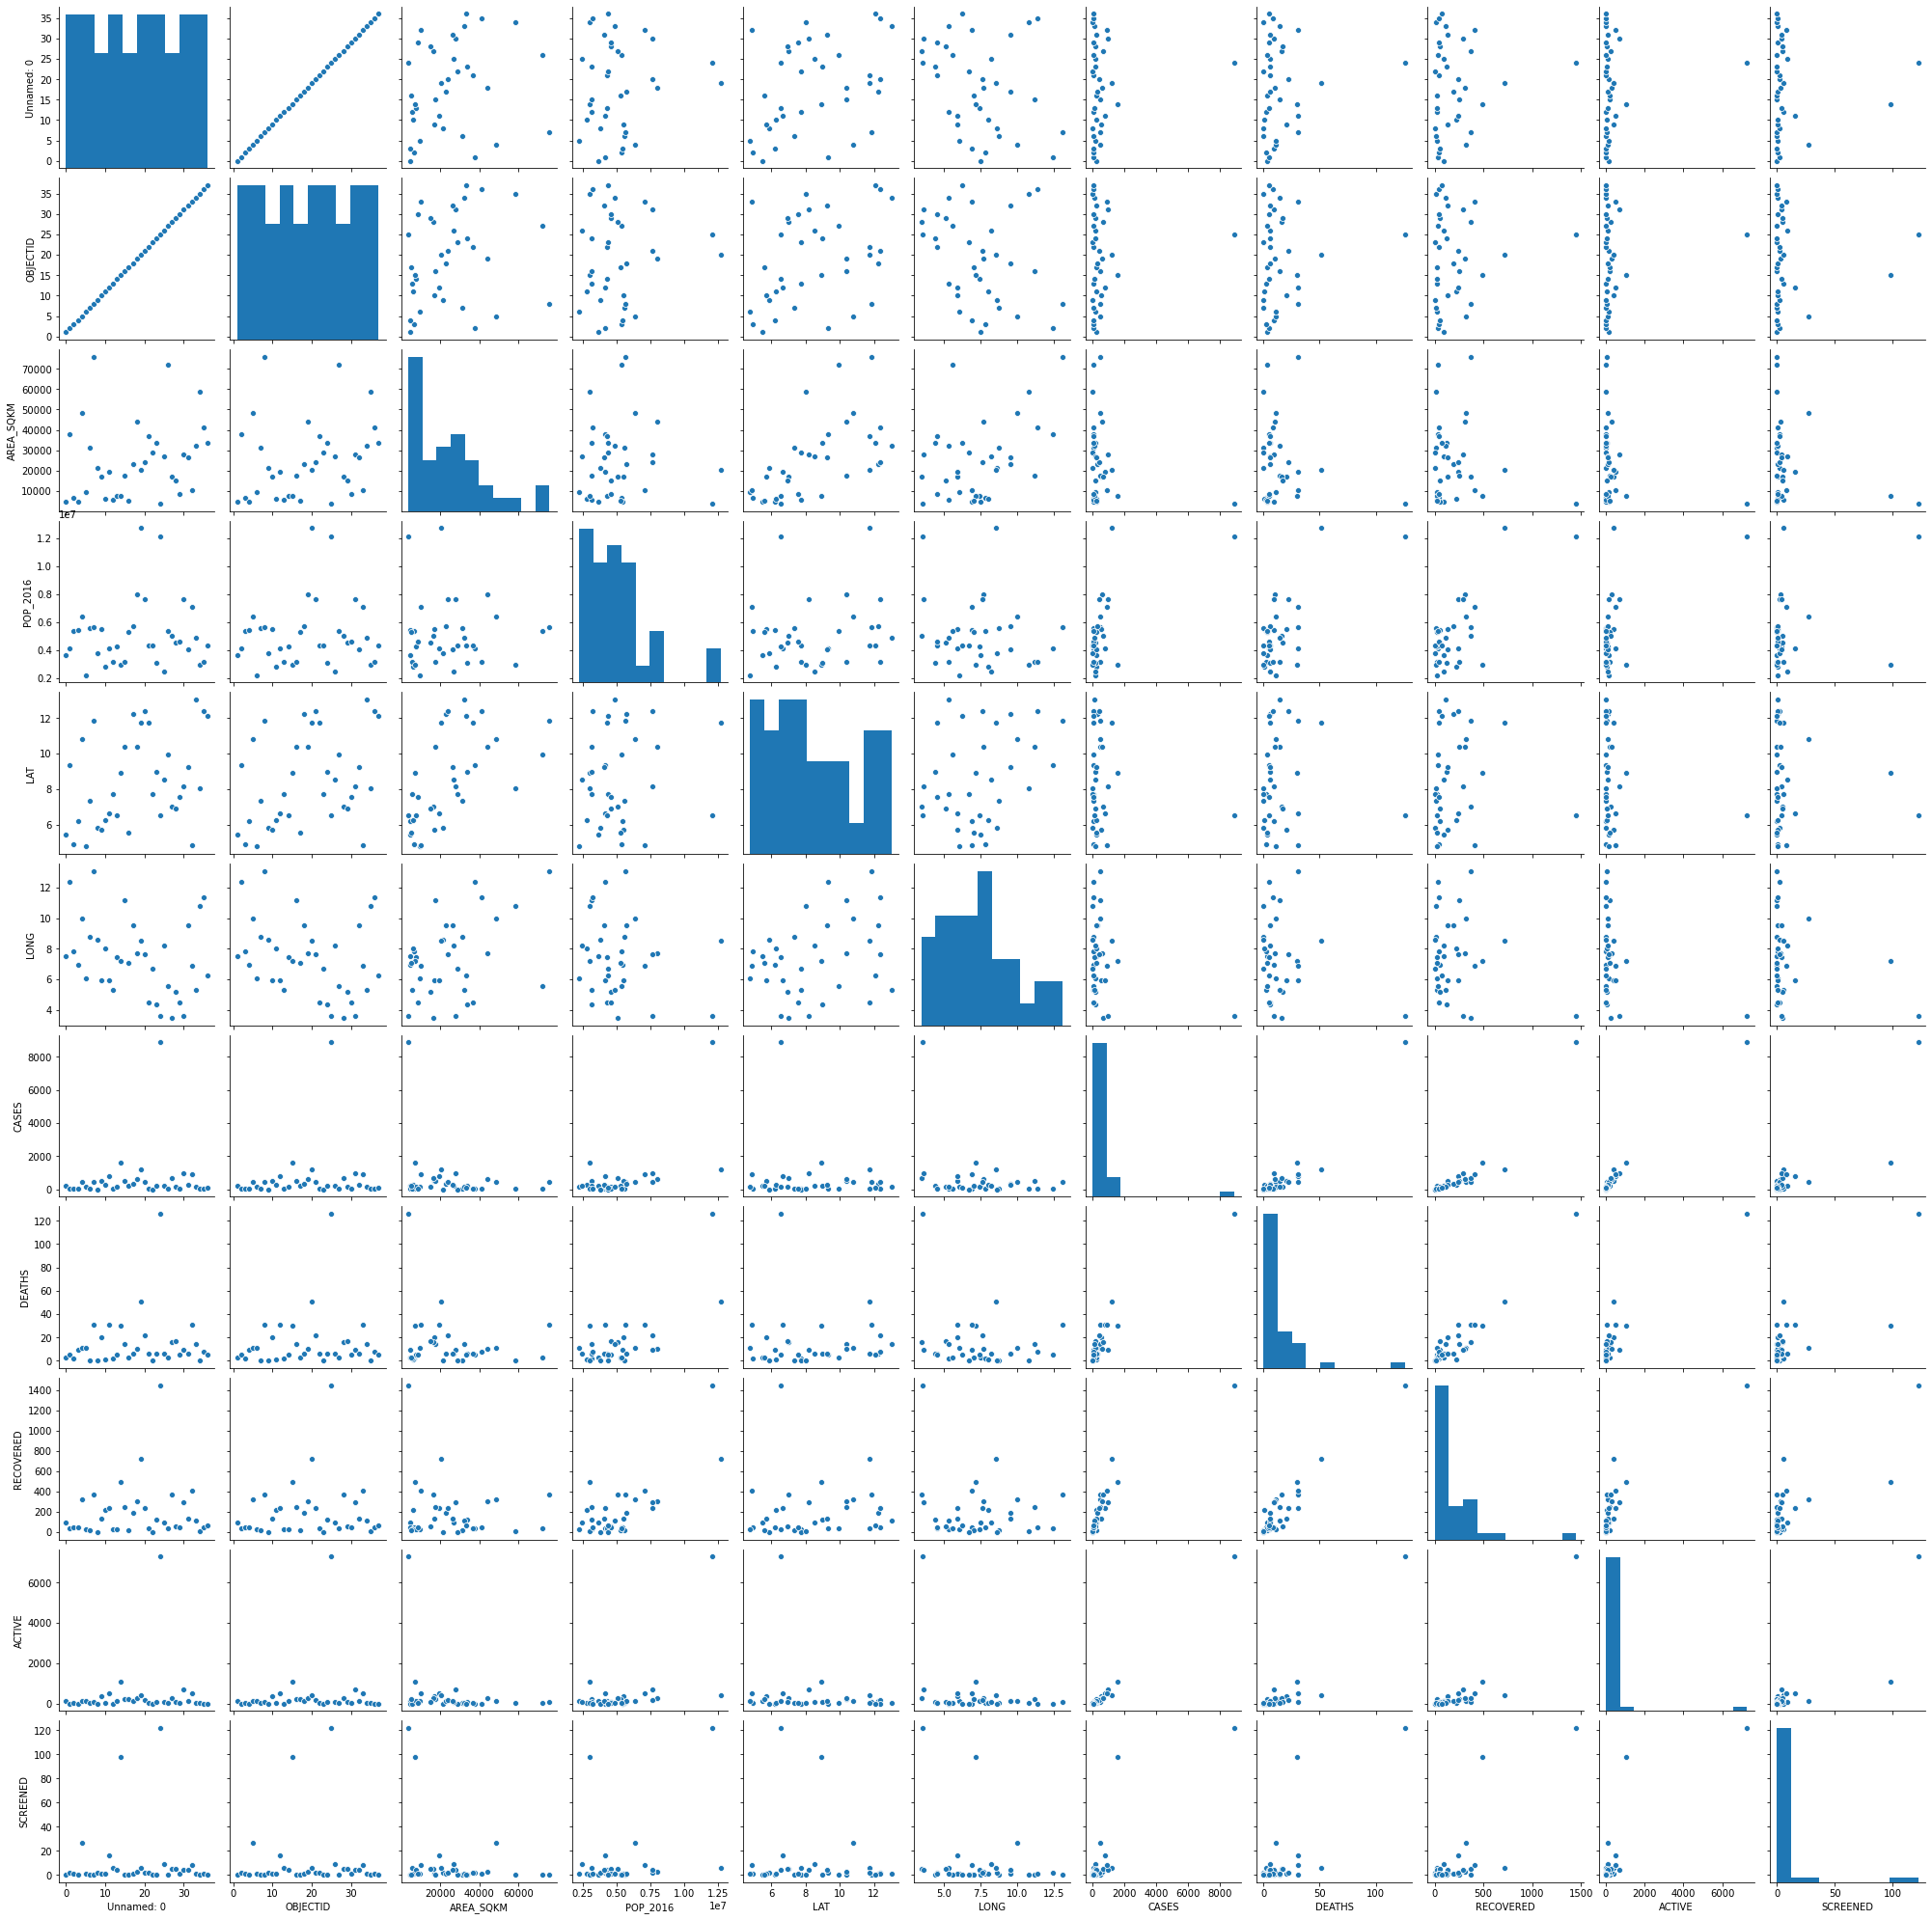

In [33]:
sns.pairplot(covid_states_nig_data)

## Signs and Symptoms:

![Symptoms](https://www.discovery.co.za/gallery/discoverycoza/content-hub/coronavirus-covid19-disease/signs-and-symptoms-corona-virus-720x350.jpg)

>Common Symptoms
Researchers in China found that the most common symptoms among people who were hospitalized with COVID-19 include:

>Fever: 99%
Fatigue:70%
A dry cough: 59%
Loss of appetite: 40%
Body aches: 35%
Shortness of breath: 31%
Mucus or phlegm: 27%
Symptoms usually begin 2 to 14 days after you come into contact with the virus.

>Other symptoms may include:
Sore throat
Headache
Chills, sometimes with shaking
Loss of smell or taste
Stuffy nose
Nausea or vomiting
Diarrhea
Emergency Symptoms
Call a doctor or hospital right away if you have one or more of these COVID-19 symptoms:

>Trouble breathing
Constant pain or pressure in your chest
Bluish lips or face
Sudden confusion
You need medical care as soon as possible. Call your doctor’s office or hospital before you go in. This will help them prepare to treat you and protect medical staff and other patients.

>Strokes have also been reported in some people who have COVID-19. 

>Remember FAST:

>Face: Is one side of the person’s face numb or drooping? Is their smile lopsided?
Arms. Is one arm weak or numb? If they try to raise both arms, does one arm sag?

>Speech: Can they speak clearly? Ask them to repeat a sentence.

>Time: Every minute counts when someone shows signs of a stroke. Call 0800-970000-10 right away.

>Lab tests can tell if COVID-19 is what’s causing your symptoms. But the tests can be hard to find, and there’s no treatment if you do have the disease. So you don’t need to get tested if you have no symptoms or only mild ones. Call your doctor or your local health department if you have questions.

## Treatment At Home
>At-Home Coronavirus Treatment
If your symptoms are mild enough that you can recover at home, you should:

>Rest. It can make you feel better and may speed your recovery.
Stay home. Don't go to work, school, or public places.

>Drink fluids. You lose more water when you're sick. Dehydration can make symptoms worse and cause other health problems.

>Monitor. If your symptoms get worse, call your doctor right away. Don't go to their office without calling first. They might tell you to stay home, or they may need to take extra steps to protect staff and other patients.

>Ask your doctor about over-the-counter medicines that may help, like acetaminophen to lower your fever.

>The most important thing to do is to avoid infecting other people, especially those who are over 65 or who have other health problems.

>That means:

>Try to stay in one place in your home. Use a separate bedroom and bathroom if you can.

>Tell others you're sick so they keep their distance.

>Cover your coughs and sneezes with a tissue or your elbow.

>Wear a mask over your nose and mouth if you can.

>Wash regularly, especially your hands.

>Don't share dishes, cups, eating utensils, towels, or bedding with anyone else.

>Clean and disinfect common surfaces like doorknobs, counters, and tabletops.


## More Info on COVID-19:
* [https://covid19.ncdc.gov.ng/](https://covid19.ncdc.gov.ng/)
* [https://www.who.int/health-topics/coronavirus](https://www.who.int/health-topics/coronavirus)
* [https://www.who.int/emergencies/diseases/novel-coronavirus-2019](https://www.who.int/emergencies/diseases/novel-coronavirus-2019)
* [https://www.nature.com/articles/s41597-020-0448-0](https://www.nature.com/articles/s41597-020-0448-0)

## Covid-19 Hotlines 
0800-970000-10 (Toll-Free Call Centre)